In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Python\Mpg\mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df['horsepower'].value_counts(dropna = False, ascending = False).head(50)

150    22
90     20
88     19
110    18
100    17
75     14
95     14
67     12
70     12
105    12
65     10
85      9
97      9
145     7
140     7
80      7
84      6
78      6
92      6
68      6
72      6
?       5
115     5
175     5
130     5
71      5
60      5
86      5
170     5
180     5
76      4
83      4
165     4
120     4
52      4
190     3
112     3
225     3
69      3
74      3
125     3
96      3
63      3
48      3
215     3
53      2
98      2
153     2
81      2
79      2
Name: horsepower, dtype: int64

In [7]:
df['horsepower'] = df['horsepower'].replace('?',np.nan)

In [8]:
df['horsepower'] = df['horsepower'].astype(float)

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [11]:
df.shape

(398, 9)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,393.0,104.460560,38.442431,46.0,75.000,94.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
df['model year'] = df['model year']+1900

In [15]:
from matplotlib import pyplot as plt

In [16]:
plt.figure(figsize = (8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

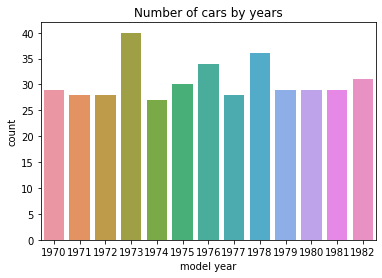

In [17]:
sns.countplot(x = 'model year', data = df)
plt.title('Number of cars by years')
plt.show()

In [18]:
df['origin'] = df['origin'].replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

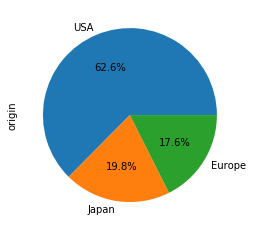

In [19]:
df['origin'].value_counts().plot.pie(autopct = '%1.1f%%')

In [20]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [21]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [22]:
df.horsepower.nunique()

94

In [23]:
df.horsepower.isnull().sum()/df.shape[0]

0.01256281407035176

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.isnull().sum().sum()

0

In [26]:
def correlation(df, size=[10, 7]):
    f, ax = plt.subplots(figsize= size)
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

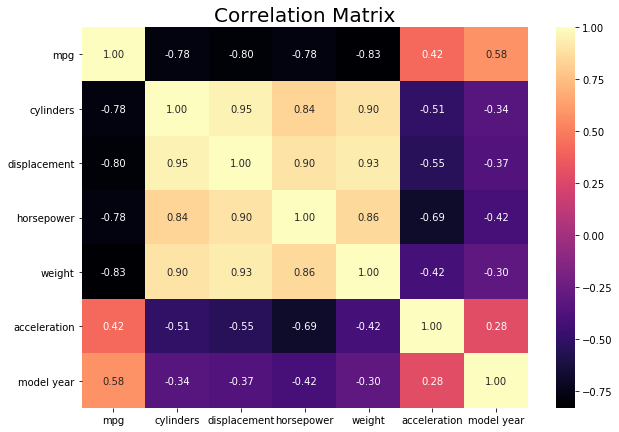

In [27]:
correlation(df)

In [28]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

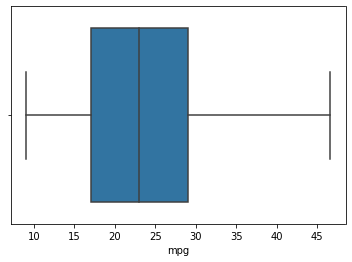

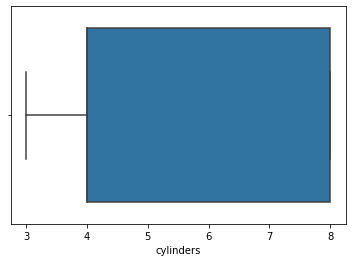

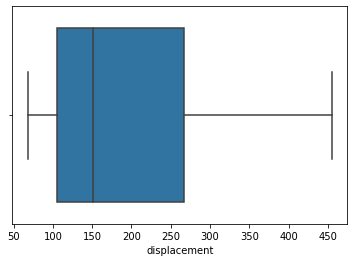

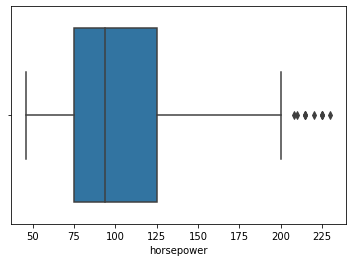

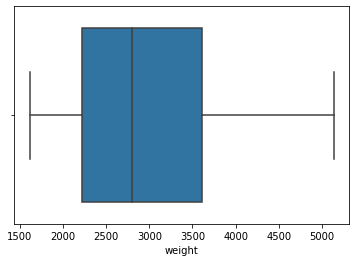

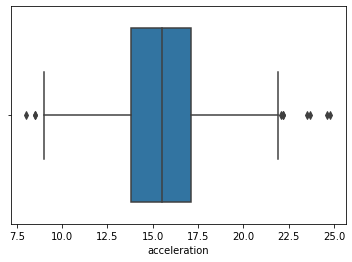

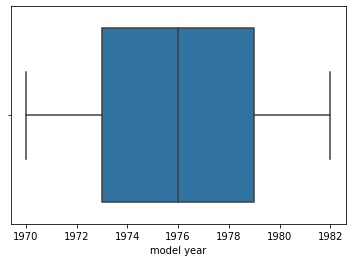

In [29]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [30]:
def outliers(df, col_name, q1=0.05, q3=0.95):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    return df[(df[col_name]>=low_limit) & (df[col_name]<=up_limit)]

In [31]:
df=pd.get_dummies(df, drop_first=True)

In [32]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,1970,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,1970,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,1970,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,1970,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,1970,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
def minmax_scaler(df, col_names, feature_range = (0, 1)):
    minmax_scaler = MinMaxScaler(feature_range = feature_range)
    col_names = [col for col in col_names]
    df[col_names] = minmax_scaler.fit_transform(df[col_names])
    return df

In [35]:
num_cols=[col for col in df.columns if df[col].dtypes != "O"]

In [36]:
df = minmax_scaler(df, num_cols)

In [37]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Japan,origin_USA,car name_amc ambassador dpl,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X=df.drop(['mpg'], axis=1)
Y=df['mpg']

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [42]:
def randomstate(x, y):
    min_error = 100
    model = Lasso()
    for i in range(1, 201):
        xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain, ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(ytest, p)
        if mse<min_error:
            min_error=mse
            j=i
            return j

In [46]:
rs = randomstate(X,Y)

In [47]:
rs

1

In [48]:
def reg_models(x, y, algo):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    algo.fit(X_train,Y_train)
    Y_train_pred=algo.predict(X_train)
    Y_test_pred=algo.predict(X_test)
    score=cross_val_score(algo,x,y,cv=10)
    train_error, train_score = mean_squared_error(Y_train, Y_train_pred), algo.score(X_train, Y_train)
    test_error,  test_score = mean_squared_error(Y_test, Y_test_pred), algo.score(X_test, Y_test)
    cross_score = np.round(score.mean(),4)
    print(type(algo).__name__)
    print('Train mse: {}'.format(train_error))
    print('Train Score: {}'.format(train_score))
    print('Test mse: {}'.format(test_error))
    print('Test Score: {}'.format(test_score))
    print('Mean of Cross Validation Score: {}'.format(cross_score))
    print('------------------------------------------------------')
    return (train_error, train_score, test_error,  test_score, cross_score)

In [49]:
models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), 
            KNeighborsRegressor(n_neighbors=3), DecisionTreeRegressor(max_depth=2)]

In [51]:
for model in models:
    reg_models(X, Y, model)

LinearRegression
Train mse: 0.0007222293153408552
Train Score: 0.9826757831376693
Test mse: 1.027084381858549e+25
Test Score: -2.220051644451646e+26
Mean of Cross Validation Score: -3.920994991196426e+25
------------------------------------------------------
Ridge
Train mse: 0.0023879667671872643
Train Score: 0.9427195029943273
Test mse: 0.010360830155309265
Test Score: 0.7760497732176952
Mean of Cross Validation Score: 0.624
------------------------------------------------------
Lasso
Train mse: 0.04168900222619881
Train Score: 0.0
Test mse: 0.04643921910911364
Test Score: -0.003787678707363629
Mean of Cross Validation Score: -0.9028
------------------------------------------------------
ElasticNet
Train mse: 0.04168900222619881
Train Score: 0.0
Test mse: 0.04643921910911364
Test Score: -0.003787678707363629
Mean of Cross Validation Score: -0.9028
------------------------------------------------------
KNeighborsRegressor
Train mse: 0.0034971259264734017
Train Score: 0.9161139451719551

In [52]:
def light_gbm(df, Y):
    lgbm=LGBMRegressor()
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=0.20)
    lgbm.fit(X_train, Y_train)

    Y_pred=lgbm.predict(X_test,num_iteration=lgbm.best_iteration_)

    print((mean_squared_error(Y_test, Y_pred)))

In [53]:
light_gbm(df,'mpg')

0.00856405171117525


In [54]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}


X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=0.20)

         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,Y_train,
                     eval_set = (X_test,Y_test),
                     plot=True,
                     verbose = False)


catf_pred = cat_model_f.predict(X_test)
test_rmse=np.sqrt(mean_squared_error(Y_test, catf_pred))
print('Test RMSE: ', test_rmse)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Test RMSE:  0.08585856769038903


In [55]:
def model_tuning(x, y, algo_cv, algo, alphas, test_size=0.20, cv=10):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=rs, test_size=test_size)
    model_cv=algo_cv(alphas=alphas, cv=cv)
    model_cv.fit(X_train, Y_train)
    model_tuned=algo(alpha=model_cv.alpha_)
    model_tuned.fit(X_train, Y_train)
    print(type(model_tuned).__name__)
    Y_train_pred=model_tuned.predict(X_train)
    train_rmse=mean_squared_error(Y_train, Y_train_pred)
    print("Train mse: {}".format(train_rmse))
    Y_test_pred=model_tuned.predict(X_test)
    test_rmse=mean_squared_error(Y_test, Y_test_pred)
    print("Test mse: {}".format(test_rmse))
    print('----------------------------------------')
    return (type(model_tuned).__name__, train_rmse, test_rmse)

In [56]:
cv_models={Ridge: RidgeCV, Lasso:LassoCV, ElasticNet:ElasticNetCV}
results_tuned={'model':[], 'train_rmse':[], 'test_rmse':[]}
alphas = [0.1,0.01, 0.005, 0.05, 0.001,0.2,0.3,0.5,0.8,0.9,1]

In [57]:
for model in cv_models:
    res=model_tuning(X, Y, cv_models[model], model, alphas)
    results_tuned['model'].append(res[0])
    results_tuned['train_rmse'].append(res[1])
    results_tuned['test_rmse'].append(res[2])

Ridge
Train mse: 0.002440894647797064
Test mse: 0.009411938160186076
----------------------------------------
Lasso
Train mse: 0.007555446924322234
Test mse: 0.008339518231659727
----------------------------------------
ElasticNet
Train mse: 0.006046232648048787
Test mse: 0.008393012134282224
----------------------------------------


In [58]:
def light_gbm_tuning(df, Y):
    X=df.drop(Y, axis=1)
    Y=df[[Y]]
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.20)
    lgbm_grid={
    'colsample_bytree':[0.4, 0.5, 0.6, 0.9, 1],
    'learning_rate':[0.01, 0.1, 0.5, 1],
           'n_estimators':[20, 40, 100, 200, 500, 1000],
           'max_depth':[1, 2, 3, 4, 5, 6, 7, 8]}

    lgbm=LGBMRegressor()

    lgbm_cv_model=GridSearchCV(lgbm, lgbm_grid, cv=10,
                           n_jobs=-1, verbose=2)

    lgbm_cv_model.fit(X_train, Y_train)

    #lgbm_cv_model.best_params_
    lgbm_tuned=LGBMRegressor(learning_rate=0.1,
                         max_depth=2,
                         n_estimators=100,
                         colsample_bytree=0.9)

    lgbm_tuned.fit(X_train, Y_train)

    Y_pred=lgbm_tuned.predict(X_test)

    print(mean_squared_error(Y_test, Y_pred))

In [59]:
light_gbm_tuning(df, 'mpg')

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2860 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3914 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 5128 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6506 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8044 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 9593 out of 9600 | elapsed:  6.2min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  6.2min finished


0.005066099032164615
